1. METODI DIRETTI

1.1 Risoluzione di sistemi lineari con matrice generica. Scrivere uno script Python che:

(a) crea un problema test di dimensione variabile n la cui soluzione esatta sia il vettore x di tutti
elementi unitari e b il termine noto ottenuto moltiplicando la matrice A per la soluzione x.

(b) calcola il numero di condizione (o una stima di esso)

(c) risolve il sistema lineare Ax = b con la fattorizzazione LU con pivoting.

Problemi test

• Una matrice di numeri casuali A generata con la funzione randn di Matlab, (n variabile fra 10 e
1000)

In [2]:
import sys
import numpy as np
import scipy
import scipy.linalg
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt

In [35]:
n= 25
A= np.random.randn(n, n)
x= np.ones ((n, 1))
b= np.matmul(A,x)
condA= np.linalg.cond(A, 1)

print ('A: ', A, '\n')
print ('x: ', x, '\n')
print ('b: ', b, '\n')
print ('K(A) = ', condA, '\n')

lu,piv = lu_factor(A)
print('lu',lu,'\n')
print('piv',piv,'\n')

my_x= lu_solve((lu, piv), b)

print('\nSoluzione calcolata con la fattorizzazione LU con pivoting: ',my_x)

Err=np.linalg.norm(my_x-x, 2)/np.linalg.norm(x)
print('Errore relativo: ', Err)

A:  [[-8.30301219e-02 -1.80456947e+00 -2.20628080e+00 -3.99058207e-01
  -1.23733951e+00 -2.52619124e-01  5.23308294e-01  4.73538439e-01
  -1.75929881e+00  2.31746439e+00 -7.82543788e-01  1.02759904e+00
   8.37399455e-01  9.17692817e-01 -1.70542347e+00 -8.39274506e-01
   8.61206764e-01  1.42049762e-01 -1.04114082e+00 -1.21892509e-01
   1.27254162e+00  4.10083973e-01  8.99922545e-01 -1.18564902e+00
   6.75476788e-01]
 [-4.47931865e-02  1.06103877e+00  4.94338410e-01  1.00069453e-02
   3.54137809e-01 -1.27491443e+00  6.92696560e-01 -1.50505496e+00
  -1.88324645e+00  1.33560442e+00 -1.71216446e+00  4.49950911e-01
   3.30951643e-01  3.77944607e-01 -4.70738832e-01  6.81974060e-02
  -1.91416406e+00  3.57844950e-02 -8.18540761e-01 -3.63114769e-02
  -1.22439432e+00 -3.64725820e-01 -1.09463182e+00 -4.34007496e-01
   1.69774835e+00]
 [-1.19768999e-01 -8.98532491e-01  2.01191553e-01 -1.06367085e+00
   1.06097166e+00  3.00796024e-01 -3.24963866e-01  9.73243835e-01
   2.34678471e+00  9.11554410e-01 

In [36]:
K_A= np.zeros((20,1))
ErrLU= np.zeros((20, 1))
for n in np.arange(10, 30):
    A= scipy.linalg.hilbert(n)
    A= np.matmul(A, np.transpose(A))
    x= np.ones((A.shape[1],1))   
    b= np.matmul(A, x)
    K_A[n-10]= np.linalg.cond(A)
    lu, piv= lu_factor(A)
    my_x= lu_solve((lu, piv), b)
    ErrLU[n-10]= np.linalg.norm(my_x-x, 2)/np.linalg.norm(x)

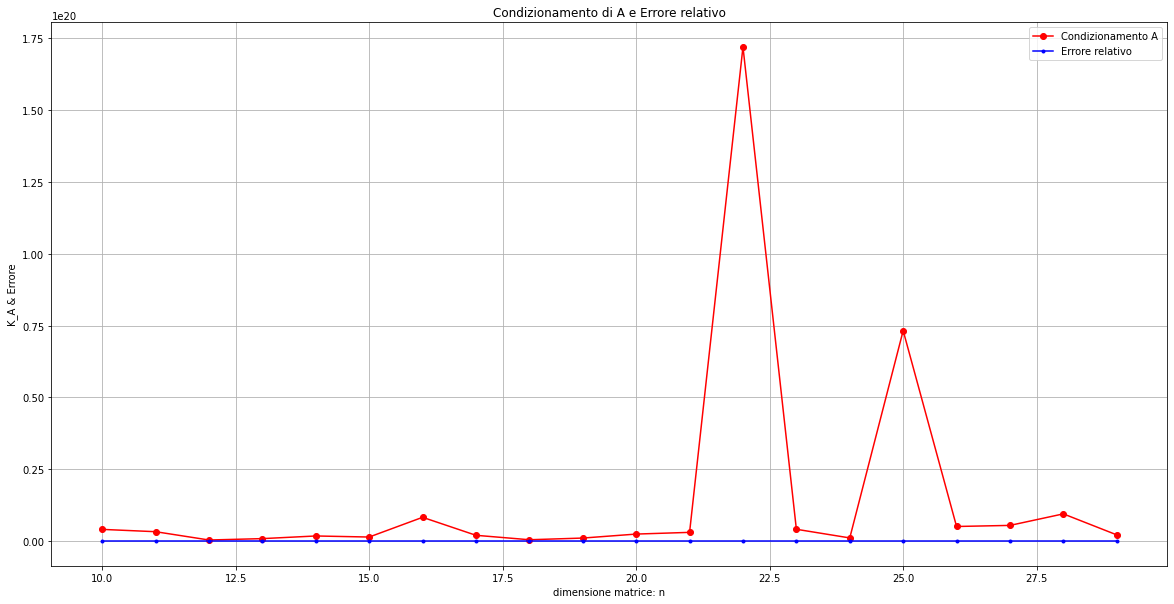

In [39]:
x= np.arange(10, 30)
fig, ax= plt.subplots(figsize=(20, 10))

ax.plot(x, K_A, color='red', label='Condizionamento A', marker='o')
ax.plot(x, ErrLU, color='blue', label='Errore relativo', marker='.')
plt.legend()
plt.title('Condizionamento di A e Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K_A & Errore')
plt.grid()
plt.show()

1.2 Risoluzione di sistemi lineari con matrice simmetrica e definita positiva.
Scrivere uno script Python che:

(a) crea un problema test di dimensione variabile n la cui soluzione esatta sia il vettore x di tutti elementi unitari e b il termine noto ottenuto moltiplicando la matrice A per la soluzione x.

(b) calcola il numero di condizione (o una stima di esso)

(c) risolve il sistema lineare Ax = b con la fattorizzazione di Cholesky..



1.2.1

PROBLEMA TEST

• matrice di Hilbert di dimensione n (con n variabile fra 2 e 15)

Per ogni problema test:

• Disegna il grafico del numero di condizione in funzione della dimensione del sistema

• Disegna il grafico dell’errore in norma 2 in funzione della dimensione del sistema

In [6]:
n= 4
A= scipy.linalg.hilbert(n)
x= np.ones((n, 1))
b= np.matmul(A, x)
condA= np.linalg.cond(A, 2)
L= np.linalg.cholesky(A)

print ('A:\n', A, '\n')
print ('x:\n', x, '\n')
print ('b:\n', b, '\n')
print ('L:\n', L, '\n')
print('LL^t: \n',L@L.T,'\n')
print ('K(A) = ', condA, '\n')

y = scipy.linalg.solve(L, b) # L y = b
my_x = scipy.linalg.solve(L.T, y) # L.T my_x = y
print('my_x = \n', my_x)
print('\n norm =', scipy.linalg.norm(y-my_x, 'fro'))


A:
 [[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]] 

x:
 [[1.]
 [1.]
 [1.]
 [1.]] 

b:
 [[2.08333333]
 [1.28333333]
 [0.95      ]
 [0.75952381]] 

L:
 [[1.         0.         0.         0.        ]
 [0.5        0.28867513 0.         0.        ]
 [0.33333333 0.28867513 0.0745356  0.        ]
 [0.25       0.25980762 0.1118034  0.01889822]] 

LL^t: 
 [[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]] 

K(A) =  15513.738738929662 

my_x = 
 [[1.]
 [1.]
 [1.]
 [1.]]

 norm = 1.6806943759419835


In [10]:
K_A= np.zeros((20,1))
ErrCho= np.zeros((20,1))
for n in np.arange(10, 30):
   A= scipy.linalg.hilbert(4)
   A=np.matmul(A,np.transpose(A))
   x=np.ones((A.shape[1],1))
   b= np.matmul(A, x)
   K_A[n-10]= np.linalg.cond(A)
   L= scipy.linalg.cholesky(A, lower=True)
   # Err[n-3]= np.linalg.norm(A-np.matmul(L, np.transpose(L)), 2)/np.linalg.norm(np.matmul(L, np.transpose(L)))
   ErrCho[n-10]= np.linalg.norm(L-x, 2)/np.linalg.norm(x)

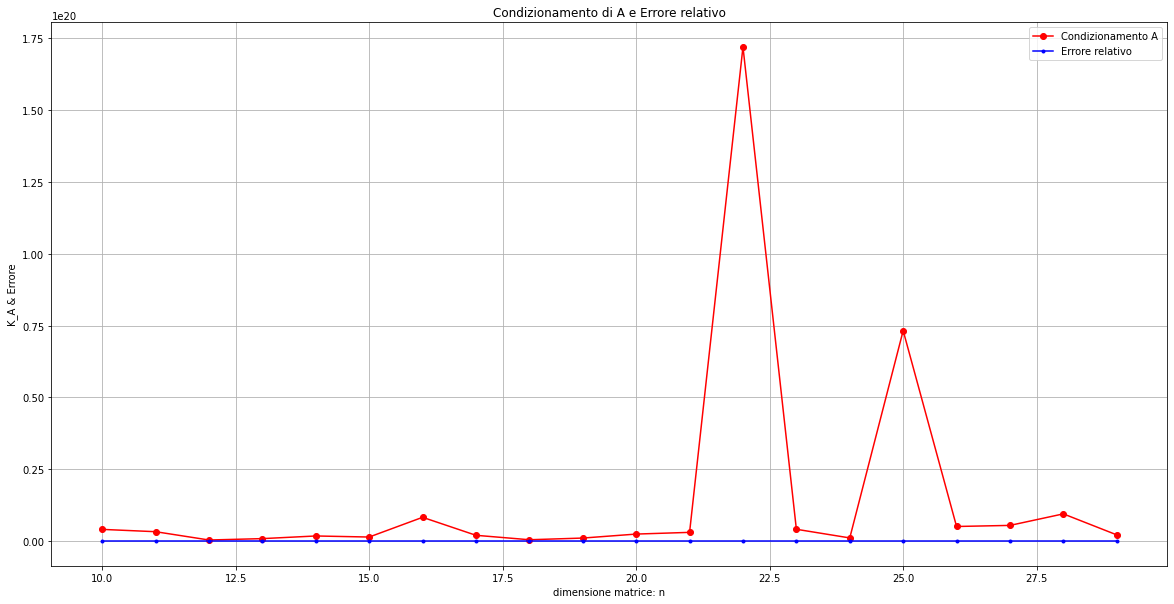

In [40]:
x= np.arange(10, 30)
fig, ax= plt.subplots(figsize=(20, 10))

ax.plot(x, K_A, color='red', label='Condizionamento A', marker='o')
ax.plot(x, ErrCho, color='blue', label='Errore relativo', marker='.')
plt.legend()
plt.title('Condizionamento di A e Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K_A & Errore')
plt.grid()
plt.show()

1.2.2

PROBLEMA TEST

• matrice tridiagonale simmetrica e definita positiva avente sulla diagonale elementi uguali a 9 e quelli sopra e sottodiagonali uguali a -4.

Per ogni problema test:

• Disegna il grafico del numero di condizione in funzione della dimensione del sistema

• Disegna il grafico dell’errore in norma 2 in funzione della dimensione del sistema

In [13]:
n=6
A= np.eye(n)*9 +np.eye(n, k=1)*-4 + np.eye(n, k=-1)*-4
x= np.ones((n, 1))
b= np.matmul(A, x)
condA= np.linalg.cond(A, 2)
L= np.linalg.cholesky(A)

print ('A:\n', A, '\n')
print ('x:\n', x, '\n')
print ('b:\n', b, '\n')
print ('L:\n', L, '\n')
print('LL^t: \n',L@L.T,'\n')
print ('K(A) = ', condA, '\n')

A:
 [[ 9. -4.  0.  0.  0.  0.]
 [-4.  9. -4.  0.  0.  0.]
 [ 0. -4.  9. -4.  0.  0.]
 [ 0.  0. -4.  9. -4.  0.]
 [ 0.  0.  0. -4.  9. -4.]
 [ 0.  0.  0.  0. -4.  9.]] 

x:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 

b:
 [[5.]
 [1.]
 [1.]
 [1.]
 [1.]
 [5.]] 

L:
 [[ 3.          0.          0.          0.          0.          0.        ]
 [-1.33333333  2.68741925  0.          0.          0.          0.        ]
 [ 0.         -1.48841682  2.60472943  0.          0.          0.        ]
 [ 0.          0.         -1.53566814  2.57715412  0.          0.        ]
 [ 0.          0.          0.         -1.55209965  2.5672917   0.        ]
 [ 0.          0.          0.          0.         -1.55806214  2.56367751]] 

LL^t: 
 [[ 9. -4.  0.  0.  0.  0.]
 [-4.  9. -4.  0.  0.  0.]
 [ 0. -4.  9. -4.  0.  0.]
 [ 0.  0. -4.  9. -4.  0.]
 [ 0.  0.  0. -4.  9. -4.]
 [ 0.  0.  0.  0. -4.  9.]] 

K(A) =  9.043247020775532 



In [42]:
# n=20
K_A= np.zeros((20,1))
Err= np.zeros((20,1))
for n in np.arange(1, 30):
   A= np.eye(n)*9 +np.eye(n, k=1)*-4 + np.eye(n, k=-1)*-4
   A=np.matmul(A, np.transpose(A))
   x=np.ones((A.shape[1],1))
   b= np.matmul(A, x)
   K_A[n-10]= np.linalg.cond(A)
   L= np.linalg.cholesky(A)
   # Err[n-10]= np.linalg.norm(A-np.matmul(L, np.transpose(L)), 2)
   Err[n-10]= np.linalg.norm(A-np.matmul(L, np.transpose(L)), 2)/np.linalg.norm(np.matmul(L, np.transpose(L)))


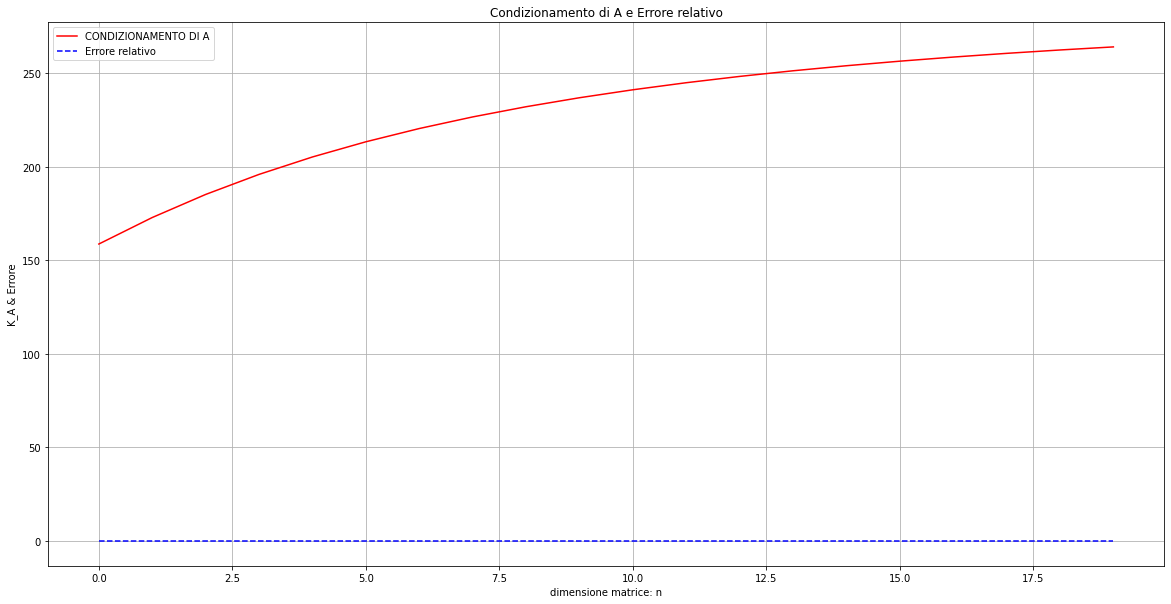

In [44]:
x= np.arange(0, 20)

# grafico del numero di condizione in funzione della dimensione del sistema
plt.figure(figsize=(20, 10))
plt.plot(x, K_A, color='red', label='CONDIZIONAMENTO DI A')

# grafico dell’errore in norma 2 in funzione della dimensione del sistema
plt.plot(x, Err, color='blue', linestyle='--', label='Errore relativo')
plt.legend()
plt.title('Condizionamento di A e Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K_A & Errore')
plt.grid()
plt.show()

2. METODI ITERATIVI

Scrivi le funzioni Jacobi(A; b; x0; maxit; tol; xTrue) e GaussSeidel(A; b; x0; maxit; tol; xTrue) per implementare i metodi di Jacobi e di Gauss Seidel per la risoluzione di sistemi lineari con matrice a
diagonale dominante. In particolare:

• x0 sia l’iterato iniziale;

• la condizione d’arresto sia dettata dal numero massimo di iterazioni consentite maxit e dalla
tolleranza tol sulla differenza relativa fra due iterati successivi;

• si preveda in input la soluzione esatta xTrue per calcolare l’errore relativo ad ogni iterazione.

Entrambe le funzioni restituiscano in output:

• la soluzione x;

• il numero k di iterazioni effettuate;

• il vettore relErr di tutti gli errori relativi.

2.1

PROBLEMA TEST

• considerare la precedente matrice tridiagonale per N>100.

• verificare, calcolando il raggio spettrale della matrice, la convergenza dei metosi.

• Eseguire i metodi con tolleranza 1.e-8.

• Riportare in un grafico l’ errore relativo (in norma 2) di entrambi i metodi al variare del numero
di iterazioni per N fiossato (scegliere almeno due valori di N).

• Riportare in un grafico l’errore relativo finale dei metodi al variare della dimensione N del sistema.

• riportare in un grafico il numero di iterazioni di entrambi i metodi al variare di N

• Riportare in un grafico il tempo impiegato dai metodi di Jacobi, Gauss Sidel, LU, Cholesky al
variare di N.

In [16]:
def Jacobi(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  norma_it=1+tol
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while (ite<maxit and norma_it>tol):
    x_old=np.copy(x)
    for i in range(0,n):
      #x[i]=(b[i]-sum([A[i,j]*x_old[j] for j in range(0,i)])-sum([A[i, j]*x_old[j] for j in range(i+1,n)]))/A[i,i]
      x[i]=(b[i]-np.dot(A[i,0:i],x_old[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i]
    ite=ite+1
    norma_it = np.linalg.norm(x_old-x)/np.linalg.norm(x_old)
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite-1] = norma_it
  relErr=relErr[:ite]
  errIter=errIter[:ite]  
  return [x, ite, relErr, errIter]


def GaussSeidel(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  errIter[0]=tol+1
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while ( ite < maxit and errIter[ite] > tol ):   
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i] 
    ite=ite+1
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite] = np.linalg.norm(x-x_old)/np.linalg.norm(x)  #fine ciclo
  relErr=relErr[:ite]
  errIter=errIter[:ite] 
  return [x, ite, relErr, errIter]

In [17]:
n=101
A= np.eye(n)*9 +np.eye(n, k=1)*-4 + np.eye(n, k=-1)*-4
xTrue= np.ones((n, 1))
b= np.matmul(A, xTrue)

x0=np.zeros((n,1))
maxit= 200
tol= 1.e-8
(xJacobi, kJacobi, relErrJacobi, errIterJacobi) = Jacobi(A, b, x0, maxit, tol, xTrue)
(xGS, kGS, relErrGS, errIterGS) = GaussSeidel(A,b,x0,maxit,tol,xTrue) 

print('\nSoluzione calcolata da Jacobi:' )
for i in range(n):
    print('%0.2f' %xJacobi[i])

print('\nSoluzione calcolata da Gauss Seidel:' )
for i in range(n):
    print('%0.2f' %xGS[i])
print('\nErrore di Jacobi:', np.linalg.norm(xJacobi-xTrue, 2))
print('\nErrore di GS:', np.linalg.norm(xGS-xTrue, 2))

C:\Users\sharo\AppData\Local\Temp\ipykernel_14176\2172552994.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  norma_it = np.linalg.norm(x_old-x)/np.linalg.norm(x_old)



Soluzione calcolata da Jacobi:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00

Soluzione calcolata da Gauss Seidel:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


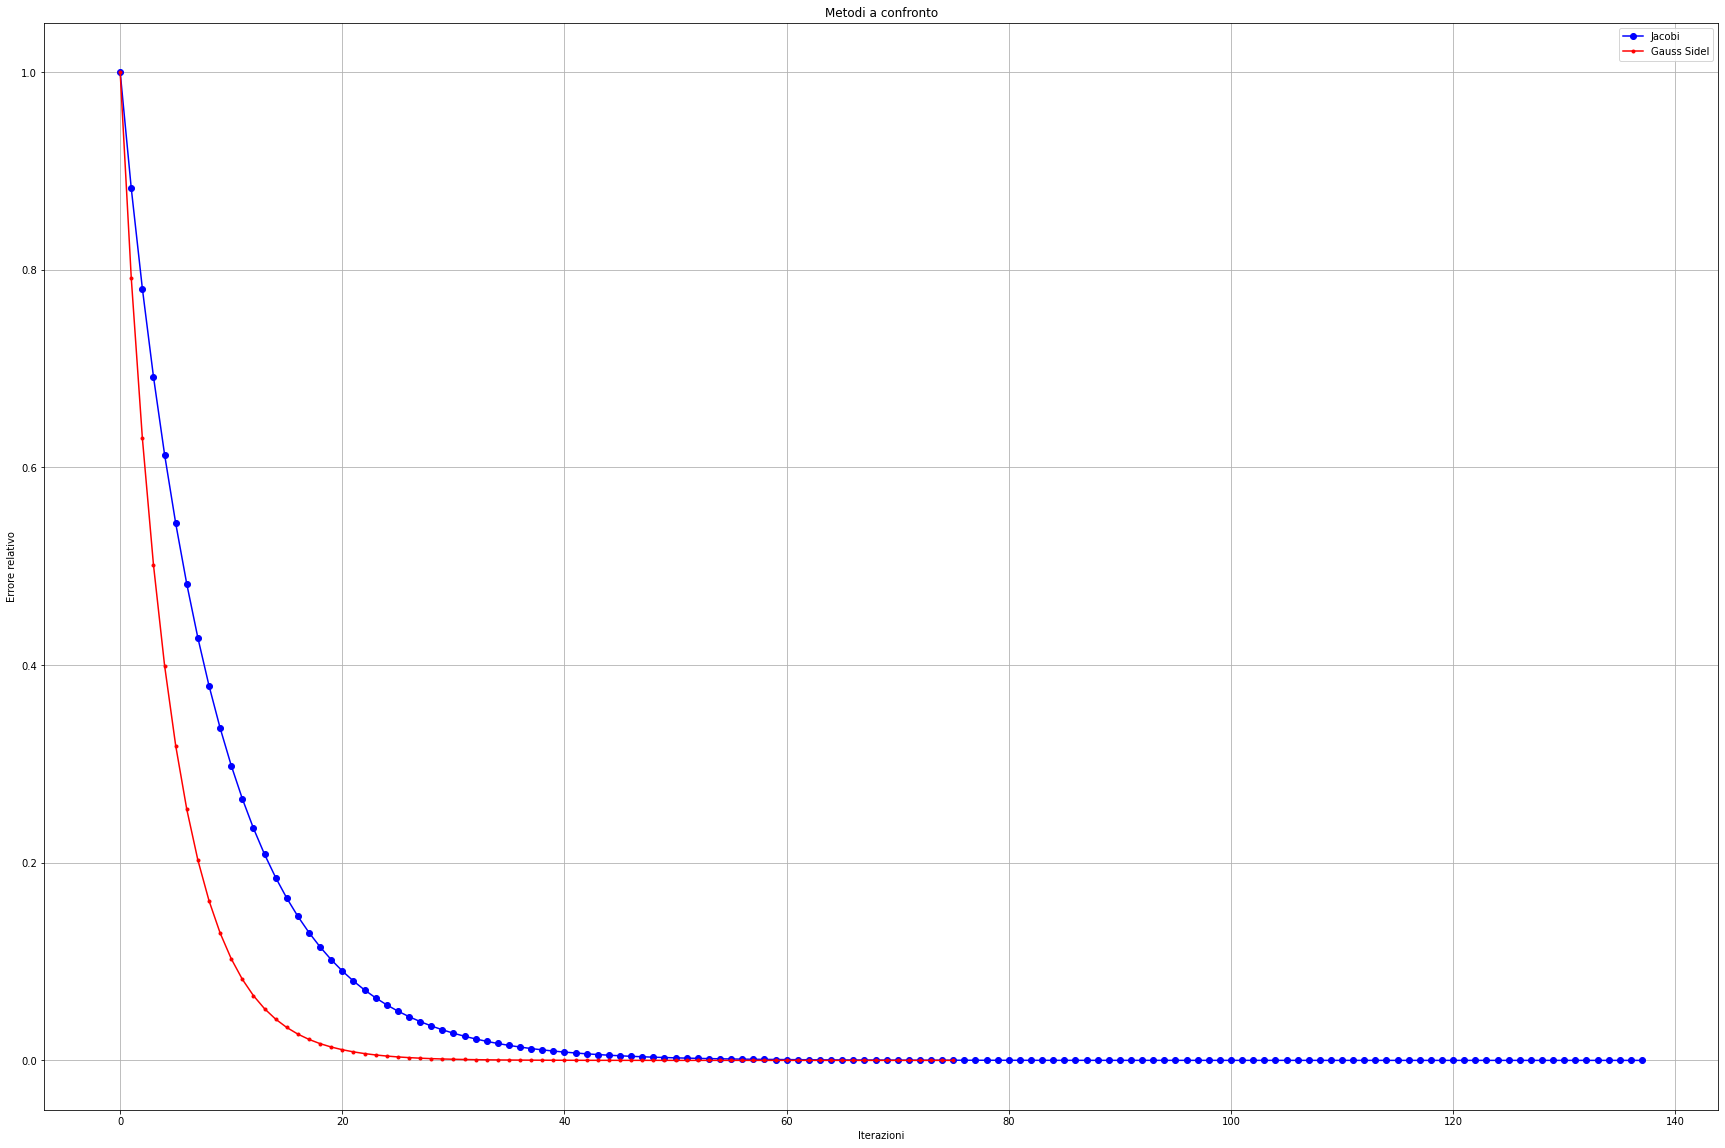

In [26]:
fig, ax= plt.subplots(figsize=(30, 20))

rangeJacobi= range(0, kJacobi)
rangeGS= range(0, kGS)

ax.plot(rangeJacobi, relErrJacobi, label='Jacobi', color='blue', marker= 'o')
ax.plot(rangeGS, relErrGS, label='Gauss Sidel', color='red', marker='.')
ax.legend()
plt.xlabel('Iterazioni')
plt.ylabel('Errore relativo')
plt.title('Metodi a confronto')
plt.grid()
plt.show()

Riportare in un grafico il tempo impiegato dai metodi di Jacobi, Gauss Sidel, LU, Cholesky al variare di N.

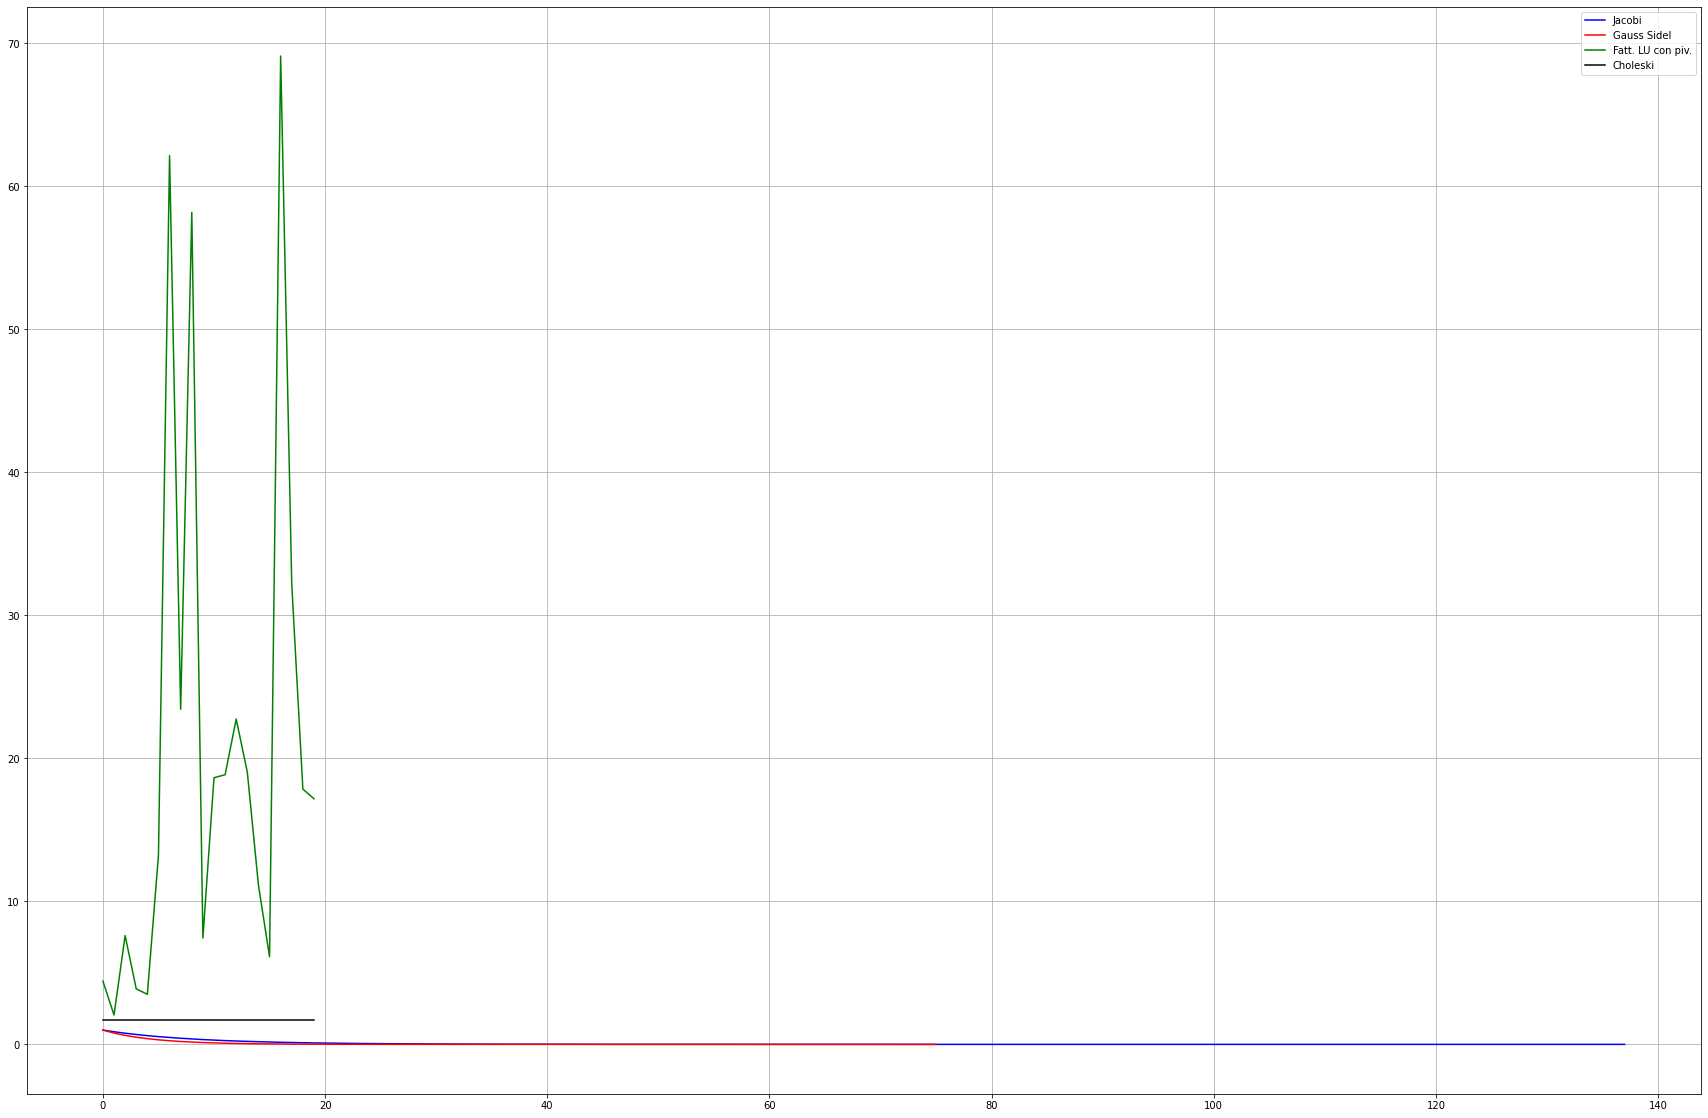

In [34]:
fig, ax= plt.subplots(figsize=(30, 20))

rangeJacobi= range(0, kJacobi)
rangeGS= range(0, kGS)
rangeLU= range(0, 20)
rangeCho= range(0, 20)

ax.plot(rangeJacobi, relErrJacobi, label='Jacobi', color='blue')
ax.plot(rangeGS, relErrGS, label='Gauss Sidel', color='red')
ax.plot(rangeLU, ErrLU, label='Fatt. LU con piv.', color='green')
ax.plot(rangeCho, ErrCho, label='Choleski', color='black')
ax.legend()
plt.grid()
plt.show()